In [2]:
import pandas as pd
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
print(df.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
import pandas as pd
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')

# Get the column names as a Pandas Index object
column_names = df.columns
print(column_names)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [10]:
#Checking Quality

print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    49811
4    11797
1     7482
3     6481
2     4428
Name: count, dtype: int64
Id                        0
ProductId                 0
UserId                    0
ProfileName               6
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64


In [11]:
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
df = pd.read_csv('data/Day3 Data/Reviews-2.csv')
df = pd.read_csv('data/Day3 Data/Reviews-3.csv')
df = pd.read_csv('data/Day3 Data/Reviews-4.csv')

In [12]:
print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64
Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   15
Text                       0
dtype: int64


In [13]:
df = df.dropna(subset=['Text', 'Score'])


In [14]:
df = df.drop_duplicates()


In [15]:
print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64
Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   15
Text                       0
dtype: int64


In [16]:
df['Text'] = df['Text'].str.lower().str.replace('[^a-z ]', '', regex=True)


In [18]:
df = df[df['Text'].str.len() > 10]


In [19]:
print(df['Score'].value_counts())


Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64


In [20]:
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')

In [22]:
df = pd.read_csv('data/Day4 Data/amazon_fashion.csv')

In [23]:
column_names = df.columns
print(column_names)

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchases', 'target'],
      dtype='object')


In [24]:
print(df['rating'].value_counts())

rating
1.0    173462
2.0    173462
3.0    173462
4.0    173462
5.0    173462
Name: count, dtype: int64


In [25]:
print(df['rating'].value_counts())
print(df.isnull().sum())


rating
1.0    173462
2.0    173462
3.0    173462
4.0    173462
5.0    173462
Name: count, dtype: int64
rating                  0
title                 203
text                  298
images                  0
asin                    0
parent_asin             0
user_id                 0
timestamp               0
helpful_vote            0
verified_purchases      0
target                  0
dtype: int64


In [27]:
df = pd.read_csv('data/Day4 Data/amazon_fashion.csv')


In [28]:
df = df.dropna(subset=['text', 'rating'])


In [29]:
df = df.drop_duplicates()


In [30]:
df['text'] = df['text'].str.lower().str.replace('[^a-z ]', '', regex=True)


In [31]:
print(df['rating'].value_counts())


rating
5.0    173108
4.0    172461
1.0    172275
3.0    172247
2.0    171657
Name: count, dtype: int64


In [32]:
import os
os.makedirs('data/cleaned_day4dataset', exist_ok=True)
df.to_csv('data/cleaned_dataset/cleaned_day4data.csv', index=False)


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

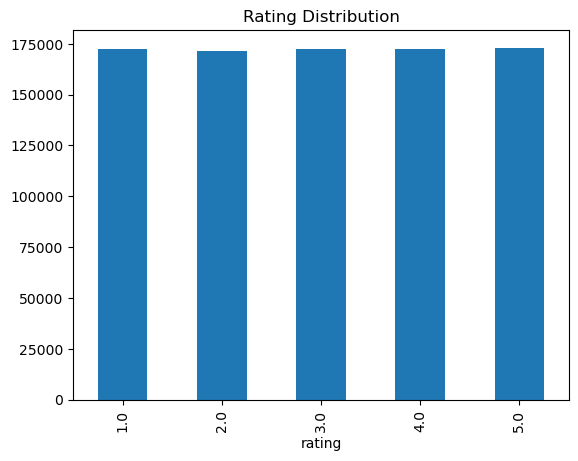

In [33]:
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')


<Axes: title={'center': 'Review Length Distribution'}, ylabel='Frequency'>

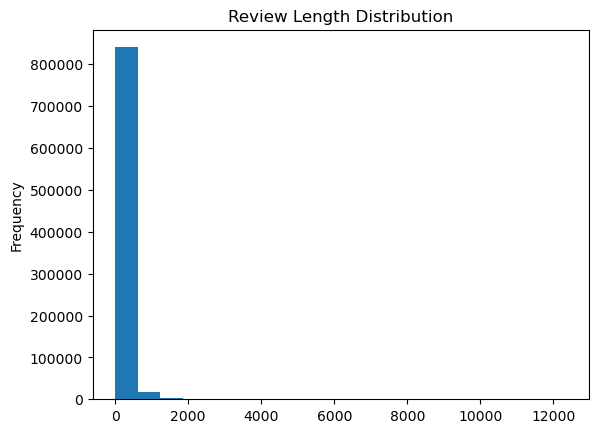

In [34]:
df['text'].str.len().plot(kind='hist', bins=20, title='Review Length Distribution')


In [35]:
balanced_df = df.groupby('rating').sample(n=2000, random_state=42, replace=True)


In [36]:
balanced_df.to_csv('data/cleaned_dataset/balanced_data.csv', index=False)


In [4]:
import pandas as pd
imbalanced_df = pd.read_csv('data/cleaned_dataset/imbalanced_data.csv')
balanced_df = pd.read_csv('data/cleaned_dataset/balanced_data.csv')


In [6]:
#Finding common entries
common = pd.merge(balanced_df, imbalanced_df, on=['Text', 'Score'])

# Remove Common entries from balanced and imbalanced
balanced_unique = balanced_df[~balanced_df.set_index(['Text', 'Score']).index.isin(
    common.set_index(['Text', 'Score']).index)]

imbalanced_unique = imbalanced_df[~imbalanced_df.set_index(['Text', 'Score']).index.isin(
    common.set_index(['Text', 'Score']).index)]


In [7]:
balanced_unique.to_csv('data/cleaned_dataset/balanced_unique.csv', index=False)
imbalanced_unique.to_csv('data/cleaned_dataset/imbalanced_unique.csv', index=False)


In [8]:
distribution = imbalanced_df['Score'].value_counts(normalize=True).sort_index() * 100
print(distribution)


Score
1     4.761905
2     9.523810
3    14.285714
4    23.809524
5    47.619048
Name: proportion, dtype: float64


In [9]:
# Total samples 
total_samples = 2000  


target_percentages = {1: 0.10, 2: 0.15, 3: 0.25, 4: 0.30, 5: 0.20}

# Calculate number of samples per class
samples_per_class = {c: int(total_samples * pct) for c, pct in target_percentages.items()}
print(samples_per_class)



{1: 200, 2: 300, 3: 500, 4: 600, 5: 400}


In [20]:
import pandas as pd
import glob

# Load and combine CSV files
csv_files = glob.glob('data/Day3 Data/Reviews-*.csv')
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)

total_samples = 2000  


target_percentages = {
    1: 0.10,
    2: 0.15,
    3: 0.20,
    4: 0.25,
    5: 0.30
}

samples_per_class = {rating: int(total_samples * pct) for rating, pct in target_percentages.items()}
print(samples_per_class)



samples_per_class = {c: int(total_samples * pct) for c, pct in target_percentages.items()}
print(samples_per_class)
dfs = []
for rating, n_samples in samples_per_class.items():
    
    class_samples = combined_df[combined_df['Score'] == rating]
    
    df_sampled = class_samples.sample(n=n_samples, random_state=42, replace=(len(class_samples)<n_samples))
    dfs.append(df_sampled)
imbalanced_fixed = pd.concat(dfs)

# Shuffle
imbalanced_fixed = imbalanced_fixed.sample(frac=1, random_state=42).reset_index(drop=True)

fixed_distribution = imbalanced_fixed['Score'].value_counts(normalize=True).sort_index() * 100
print(fixed_distribution)

{1: 200, 2: 300, 3: 500, 4: 600, 5: 400}
Score
1    10.0
2    15.0
3    25.0
4    30.0
5    20.0
Name: proportion, dtype: float64


In [24]:
import pandas as pd
import glob

# Load and combine CSV files
csv_files = glob.glob('data/Day3 Data/Reviews-*.csv')
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)

total_samples = 2000

# Updated target_percentages to match the image
target_percentages = {
    1: 0.10,  
    2: 0.15,  
    3: 0.25,  
    4: 0.30, 
    5: 0.20   
}

# Calculate number of samples per class based on new percentages and total_samples
samples_per_class = {score: int(total_samples * percentage) for score, percentage in target_percentages.items()}

dfs = []
for score, n_samples in samples_per_class.items():
    class_samples = combined_df[combined_df['Score'] == score] # Changed 'df' to 'combined_df' to use the loaded data
    df_sampled = class_samples.sample(
        n=n_samples,
        random_state=42,
        replace=(len(class_samples) < n_samples)
    )
    dfs.append(df_sampled)

imbalanced_df = pd.concat(dfs).sample(frac=1, random_state=42).reset_index(drop=True)

print(imbalanced_df['Score'].value_counts())
print(imbalanced_df['Score'].value_counts(normalize=True) * 100)


Score
4    600
3    500
5    400
2    300
1    200
Name: count, dtype: int64
Score
4    30.0
3    25.0
5    20.0
2    15.0
1    10.0
Name: proportion, dtype: float64


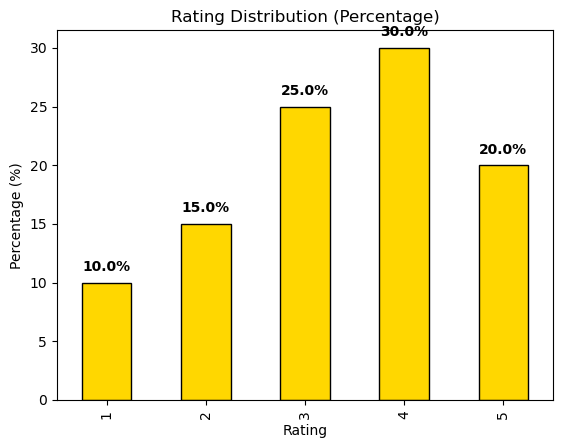

In [25]:
imbalanced_df.to_csv("data/cleaned_dataset/imbalanced_data_percent.csv", index=False)

import matplotlib.pyplot as plt

dist = imbalanced_df['Score'].value_counts(normalize=True).sort_index() * 100
dist.plot(kind='bar', color='gold', edgecolor='black')
plt.title("Rating Distribution (Percentage)")
plt.xlabel("Rating")
plt.ylabel("Percentage (%)")
for i, v in enumerate(dist):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()
